In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression as lr, Lasso as ls, Ridge as rg, ElasticNet as en, LogisticRegression as loglr
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsRegressor as knr, KNeighborsClassifier as knc, KernelDensity
from sklearn.ensemble import RandomForestRegressor as rfr, GradientBoostingRegressor as gbr, RandomForestClassifier as rfc, GradientBoostingClassifier as gbc
from sklearn.preprocessing import Imputer, normalize, StandardScaler, MinMaxScaler, LabelBinarizer, RobustScaler
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
from sklearn.cross_validation import KFold, train_test_split as tts
from catboost import CatBoostRegressor as cbr
from sklearn.tree import DecisionTreeRegressor as dtr, DecisionTreeClassifier as dtc
from nltk.tokenize import word_tokenize, PunktSentenceTokenizer as pst
from sklearn.neural_network import MLPRegressor
mms = MinMaxScaler()
rc = RobustScaler()
ss = StandardScaler()

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('C:/Users/visha/Desktop/stat wars/energy/train.csv', header = 0, index_col = None)

In [3]:
del df_train['Observation']

In [4]:
df_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy
0,22.700000,37.200,21.000000,38.000000,23.390000,37.290000,22.832857,34.942857,20.500000,42.826667,...,45.360000,20.20,38.663333,12.80,760.050000,62.000000,3.5,28.0,5.65,70
1,21.500000,41.045,20.500000,39.133333,22.926667,39.526667,21.700000,34.126667,18.633333,44.663333,...,34.663333,19.73,37.933333,8.47,764.166667,48.166667,8.0,26.5,-1.92,210
2,21.666667,38.000,22.600000,35.700000,21.890000,36.590000,22.000000,35.530000,19.000000,46.200000,...,38.545000,19.79,39.430000,10.60,757.600000,57.000000,2.0,27.0,2.40,50
3,23.290000,38.530,21.671429,38.000000,24.290000,36.200000,23.100000,35.090000,22.042857,43.625714,...,38.600000,22.60,36.194286,11.60,760.600000,63.000000,1.0,40.0,4.67,50
4,24.000000,42.560,26.830000,34.356000,26.530000,40.333333,24.500000,40.900000,21.500000,49.090000,...,44.230000,22.60,44.090000,17.70,756.983333,63.000000,1.0,21.5,10.40,250


In [5]:
df_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Energy'],
      dtype='object')

In [6]:
file = open('C:/Users/visha/Desktop/stat wars/energy/ivs.txt', 'r')
for word in file:
    print(word)



Variable name	Description

Observation	Observation ID

T1	Temperature in kitchen area in Celsius

RH_1	Humidity in kitchen area in %

T2	Temperature in living room area in Celsius

RH_2	Humidity in living room area in %

T3	Temperature in laundry room area in Celsius

RH_3	Humidity in laundry room area in %

T4	Temperature in office room in Celsius

RH_4	Humidity in office room in %

T5	Temperature in bathroom in Celsius

RH_5	Humidity in bathroom in %

T6	Temperature outside the building (north side) in Celsius

RH_6	Humidity outside the building (north side) in %

T7	Temperature in ironing room in Celsius

RH_7	Humidity in ironing room in %

T8	Temperature in teenager room 2 in Celsius

RH_8	Humidity in teenager room 2 in %

T9	Temperature in parents room in Celsius

RH_9	Humidity in parents room in %

To	Temperature outside in Celsius

Pressure	Outside pressure in mm Hg

RH_out	Humidity outside in %

Wind speed	Speed of wind outside in m/s

Visibility	Visibility from outside measu

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 25 columns):
T1             15780 non-null float64
RH_1           15780 non-null float64
T2             15780 non-null float64
RH_2           15780 non-null float64
T3             15780 non-null float64
RH_3           15780 non-null float64
T4             15780 non-null float64
RH_4           15780 non-null float64
T5             15780 non-null float64
RH_5           15780 non-null float64
T6             15780 non-null float64
RH_6           15780 non-null float64
T7             15780 non-null float64
RH_7           15780 non-null float64
T8             15780 non-null float64
RH_8           15780 non-null float64
T9             15780 non-null float64
RH_9           15780 non-null float64
T_out          15780 non-null float64
Press_mm_hg    15780 non-null float64
RH_out         15780 non-null float64
Windspeed      15780 non-null float64
Visibility     15780 non-null float64
Tdewpoint      15

In [8]:
for var in df_train.columns:
    print(df_train[var].describe())
    print('\n')

count    15780.000000
mean        21.683008
std          1.613157
min         16.790000
25%         20.730000
50%         21.600000
75%         22.600000
max         26.260000
Name: T1, dtype: float64


count    15780.000000
mean        40.263077
std          3.983819
min         27.023333
25%         37.360000
50%         39.663333
75%         43.090000
max         63.360000
Name: RH_1, dtype: float64


count    15780.000000
mean        20.339386
std          2.199896
min         16.100000
25%         18.790000
50%         20.000000
75%         21.530000
max         29.856667
Name: T2, dtype: float64


count    15780.000000
mean        40.426604
std          4.085470
min         20.463333
25%         37.890000
50%         40.500000
75%         43.290000
max         56.026667
Name: RH_2, dtype: float64


count    15780.000000
mean        22.265359
std          2.013391
min         17.200000
25%         20.790000
50%         22.100000
75%         23.290000
max         29.236000
Name: T3

In [10]:
corr = df_train.corr('spearman')
corr['Energy']

T1             0.234190
RH_1           0.053282
T2             0.298179
RH_2          -0.123365
T3             0.206965
RH_3          -0.060166
T4             0.199759
RH_4          -0.023122
T5             0.175355
RH_5          -0.049791
T6             0.237056
RH_6          -0.226331
T7             0.175004
RH_7          -0.121735
T8             0.229104
RH_8          -0.219523
T9             0.159260
RH_9          -0.166078
T_out          0.209582
Press_mm_hg   -0.094260
RH_out        -0.267376
Windspeed      0.114033
Visibility    -0.005701
Tdewpoint      0.069802
Energy         1.000000
Name: Energy, dtype: float64

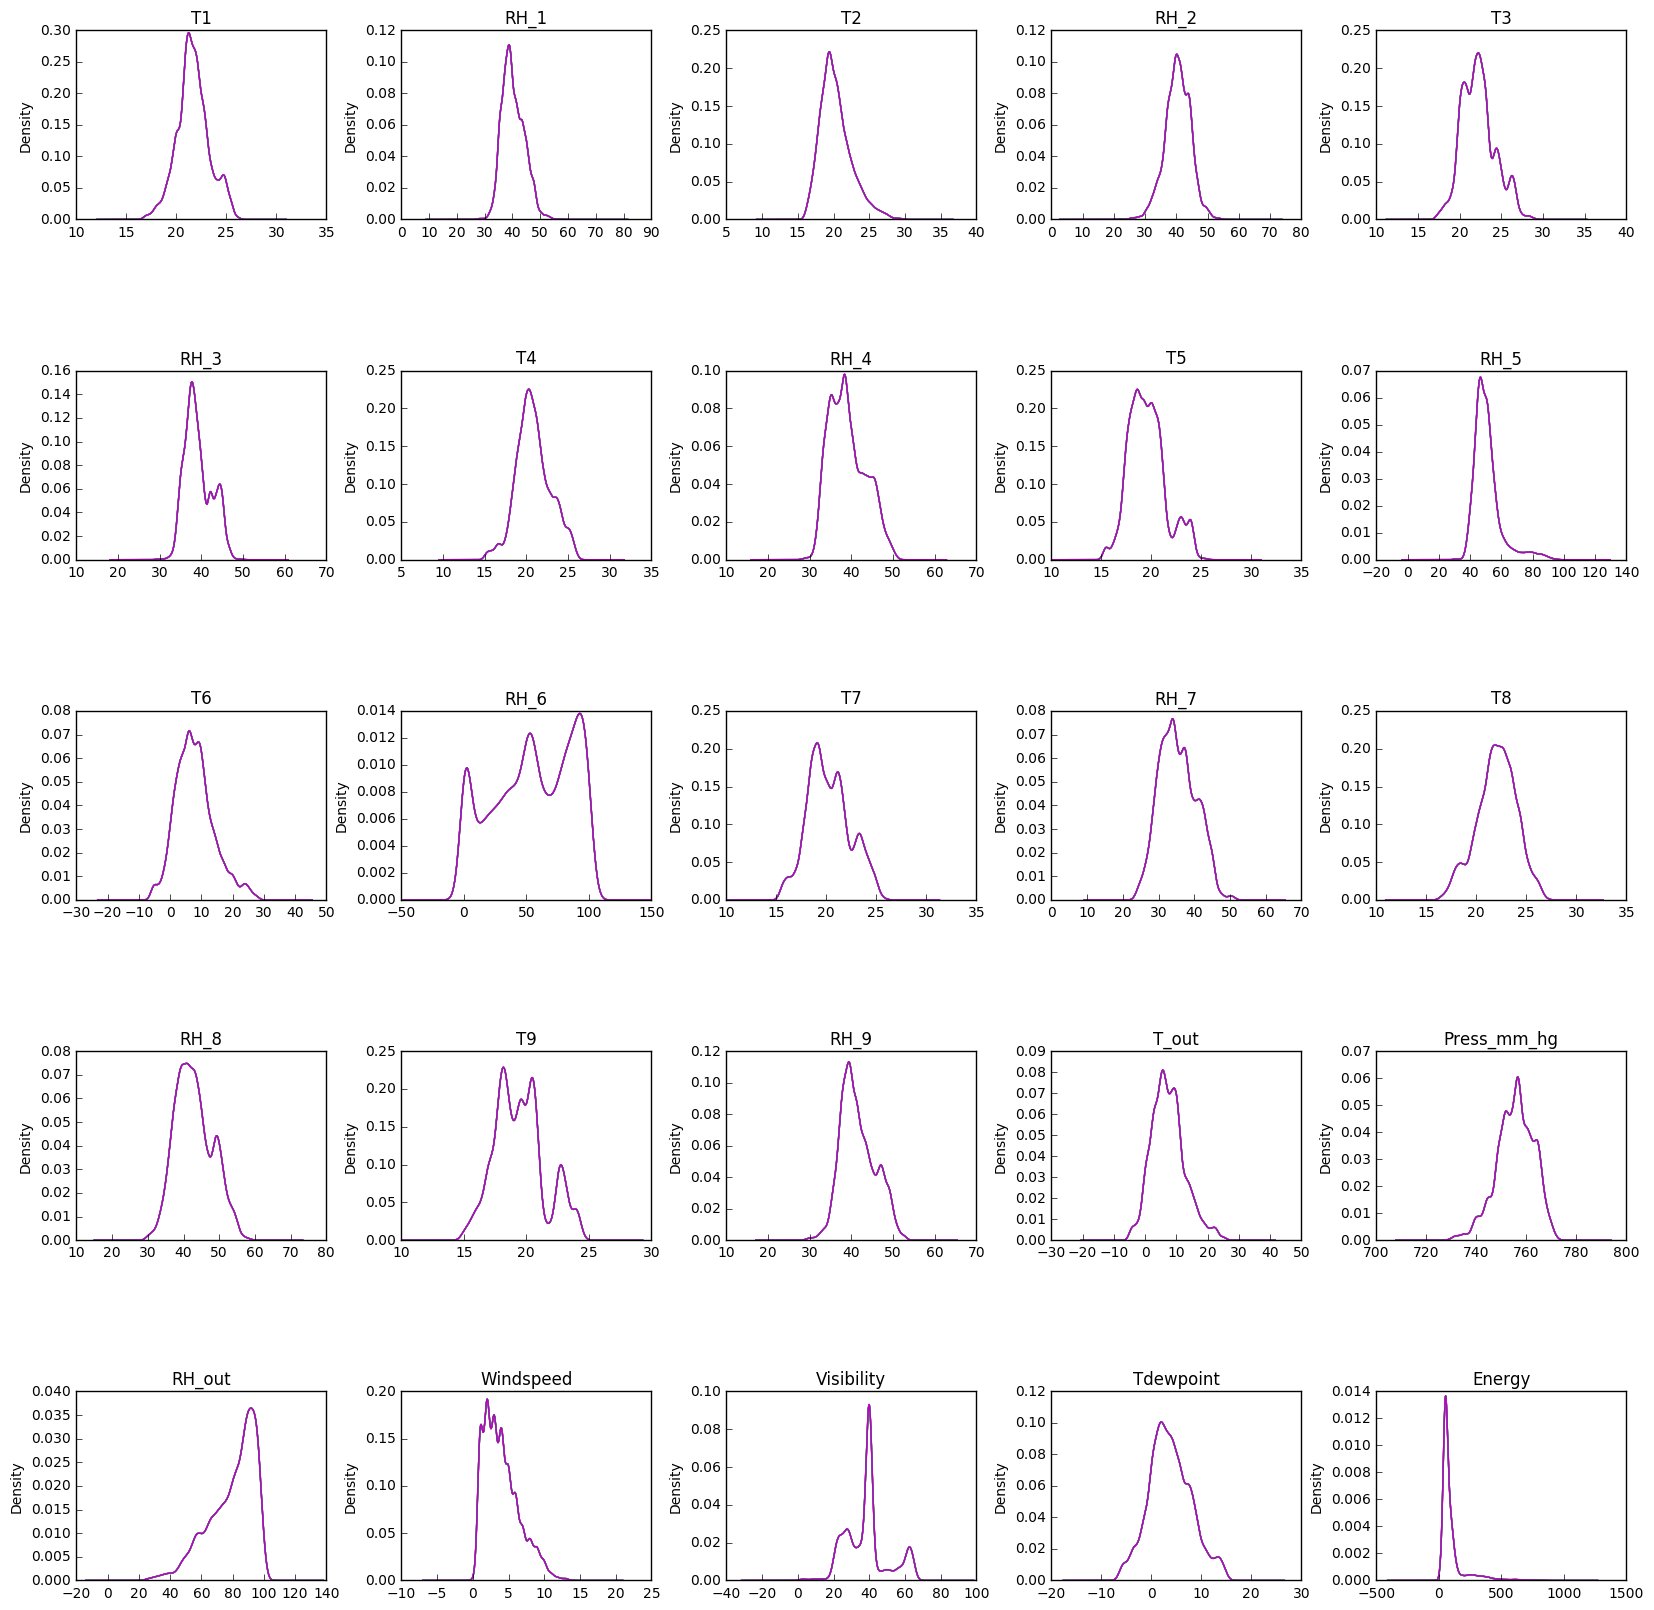

In [11]:

%matplotlib inline


num_df = df_train.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(5,5, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

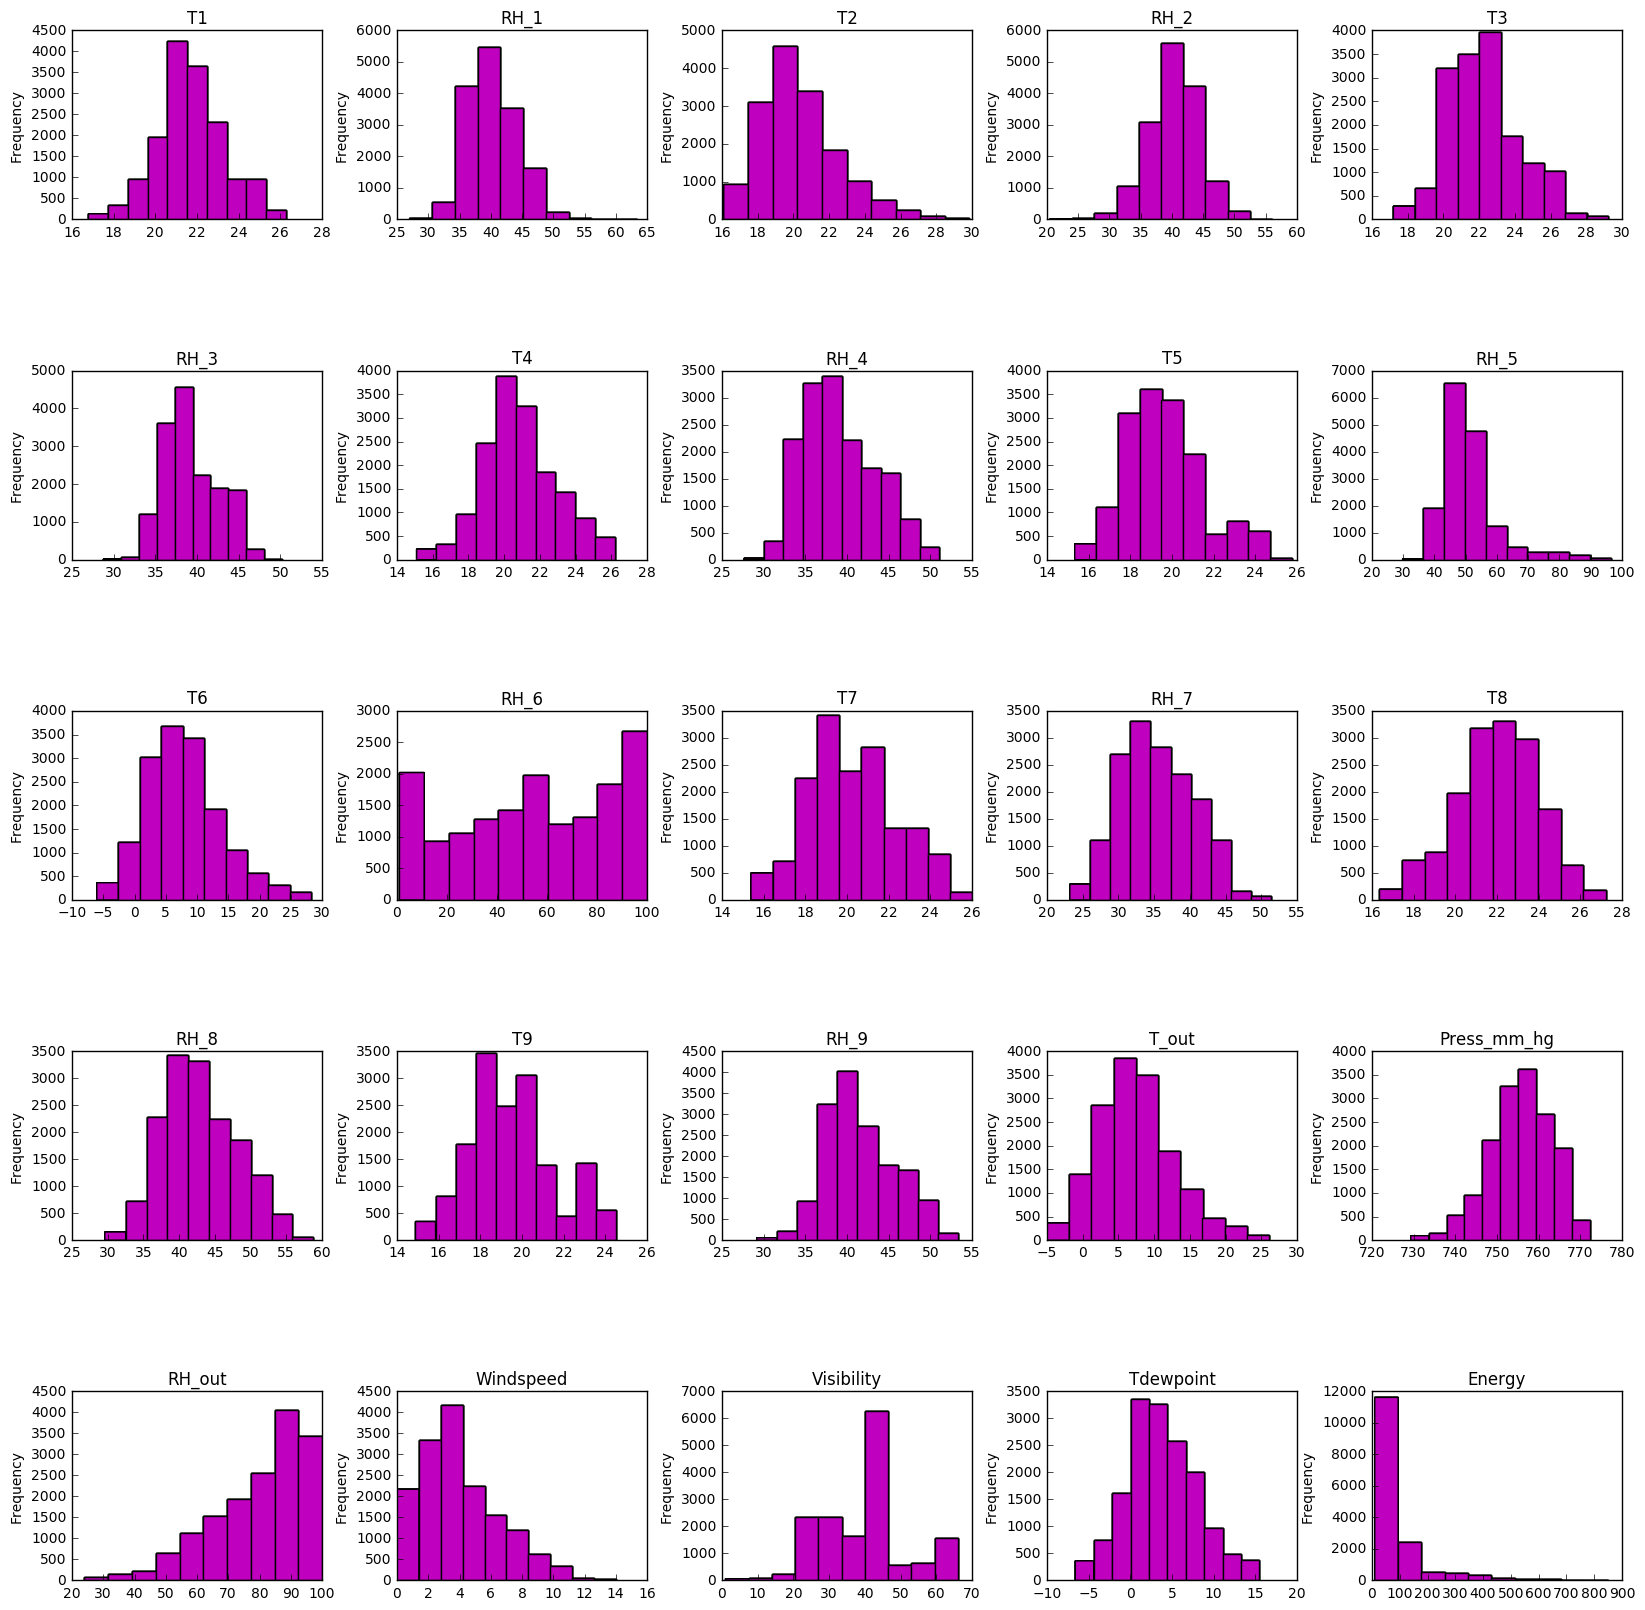

In [12]:

%matplotlib inline


num_df = df_train.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(5,5, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.hist(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

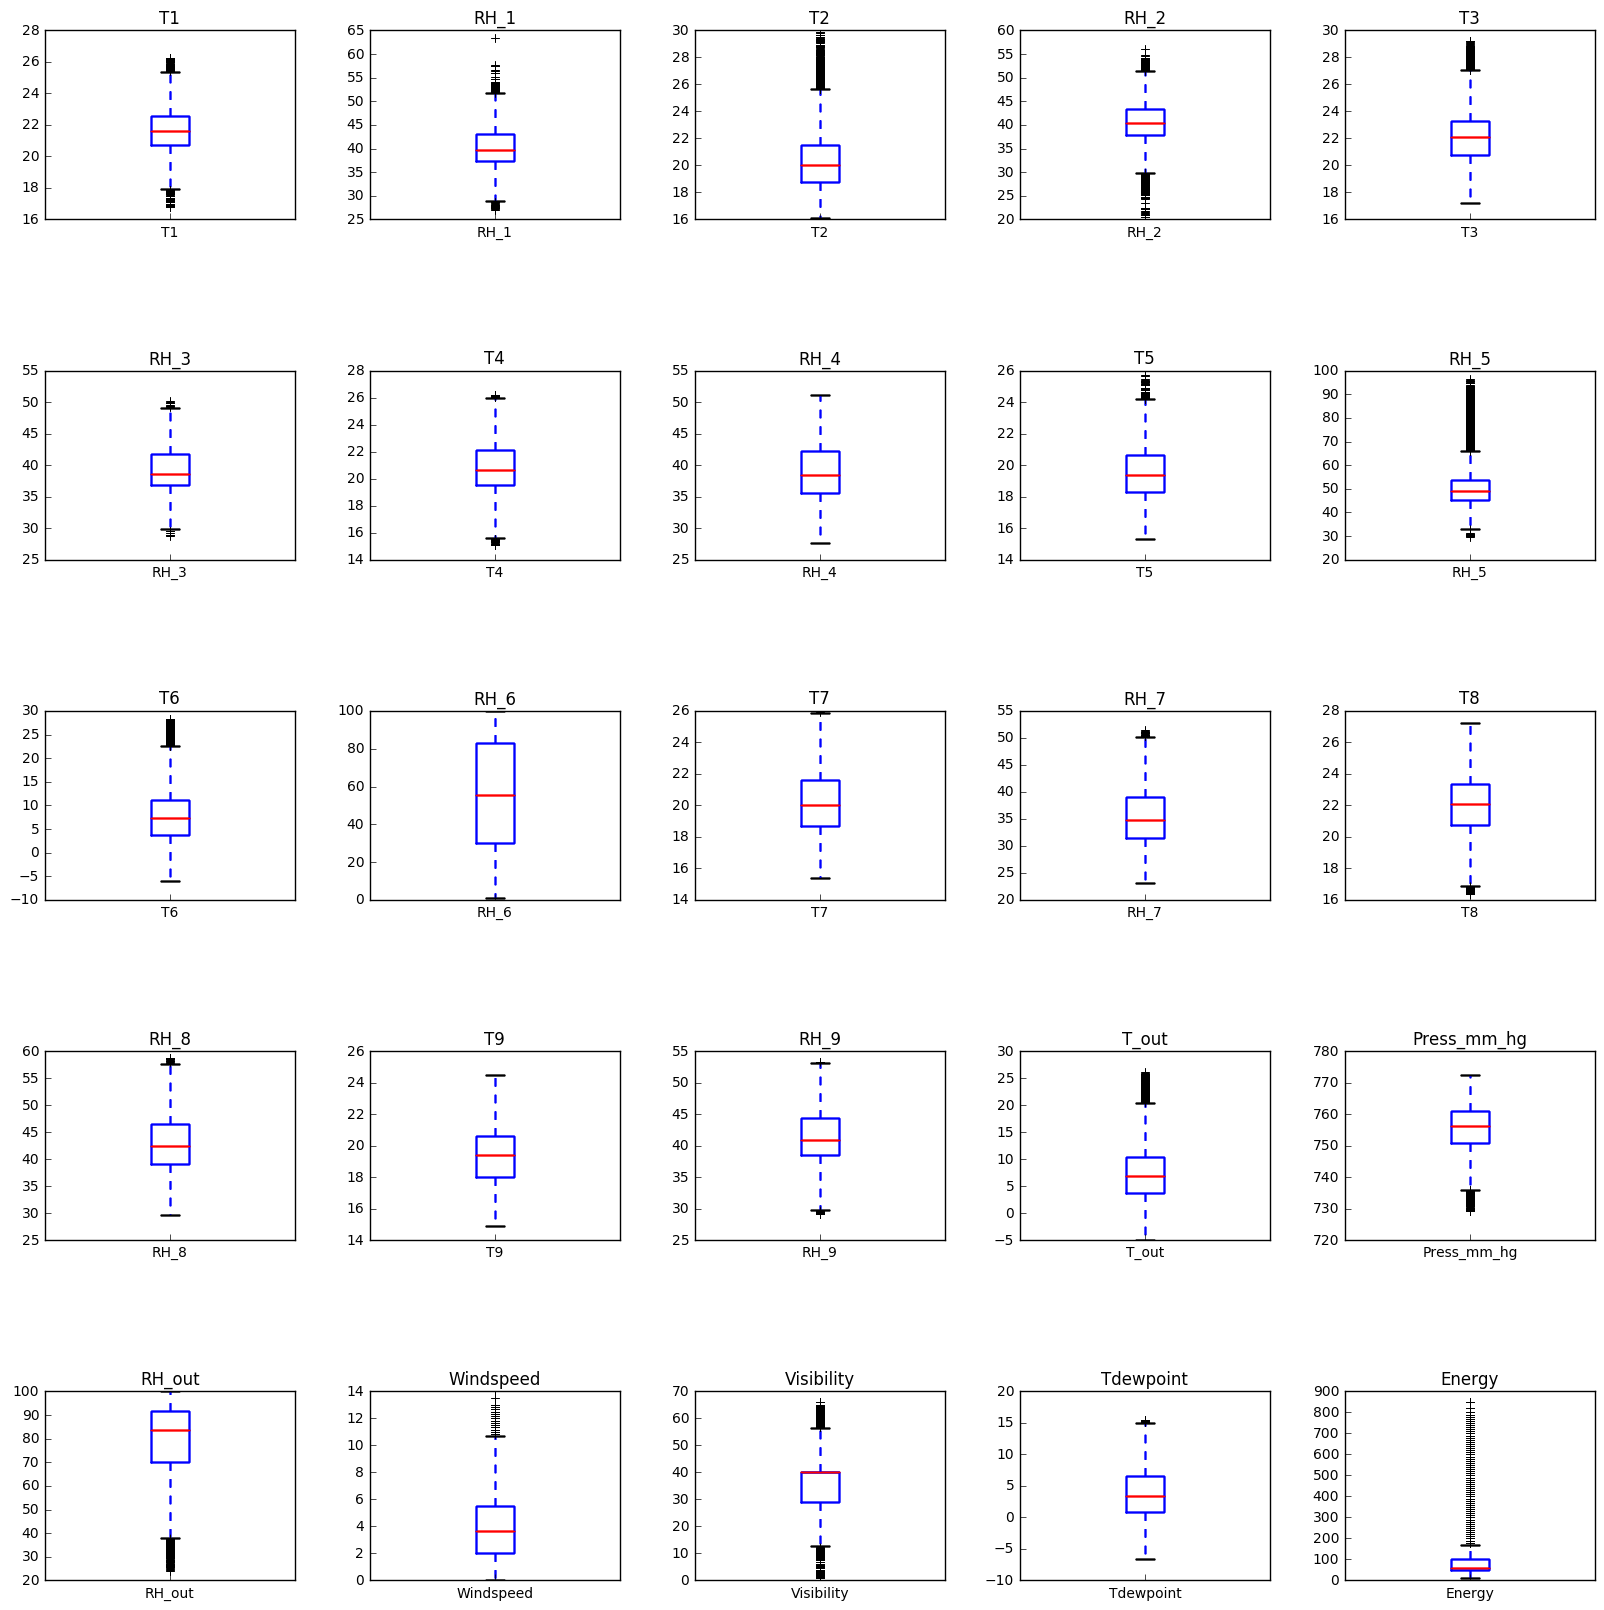

In [13]:

%matplotlib inline


num_df = df_train.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(5,5, figsize = (20,20))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.box(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

In [14]:
df_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Energy'],
      dtype='object')

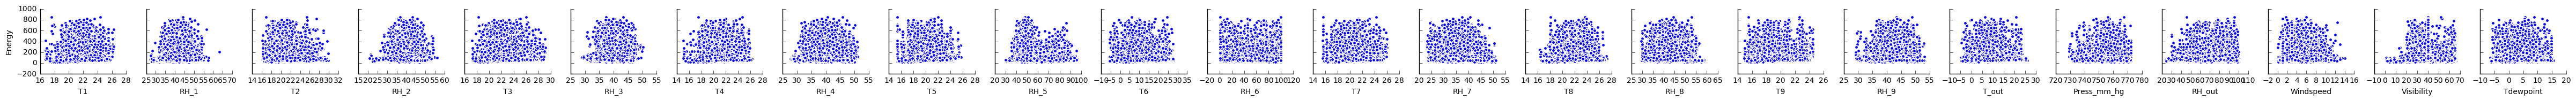

In [15]:
sns.pairplot(df_train, x_vars = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint'], y_vars = ['Energy'], diag_kind = 'hist', size = 2)

In [63]:
X = df_train[['T1', 'T2', 'RH_2', 'T3', 'T4', 'T5', 'T6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'Windspeed']]
y = df_train['Energy']

In [64]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = .33, random_state = 1)

In [18]:
Lin = lr()

In [19]:
Lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

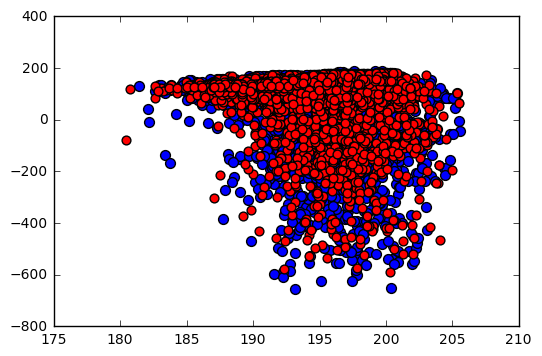

In [20]:
plt.scatter(Lin.predict(mms.fit_transform(X_train)), Lin.predict(mms.fit_transform(X_train)) - y_train, c = 'b', s = 50)
plt.scatter(Lin.predict(mms.fit_transform(X_test)), Lin.predict(mms.fit_transform(X_test)) - y_test, c = 'r', s = 40)

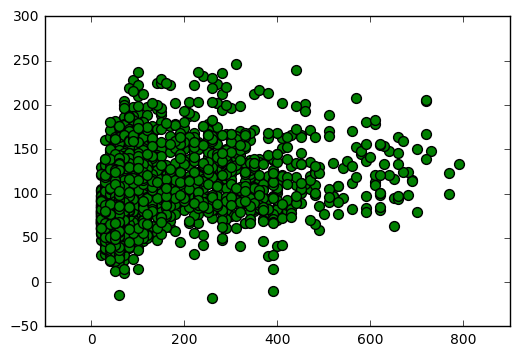

In [21]:
plt.scatter(y_test, Lin.predict(X_test), c = 'g', s = 50)

In [22]:
np.sqrt(metrics.mean_squared_error(y_test, Lin.predict(X_test)))

94.963841863210803

In [23]:
las = ls(alpha = .3, selection = 'random', random_state = 1)

In [24]:
las.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='random', tol=0.0001, warm_start=False)

In [25]:
np.sqrt(metrics.mean_squared_error(y_test, las.predict(X_test)))

94.929908712854456

In [26]:
rid = rg(alpha = .5, solver = 'saga', random_state = 1)

In [27]:
rid.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='saga', tol=0.001)

In [28]:
np.sqrt(metrics.mean_squared_error(y_test, rid.predict(X_test)))

94.96335815410248

In [29]:
tr = dtr(splitter = 'random', max_features = 5, random_state = 1)

In [30]:
tr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=5,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='random')

In [31]:
np.sqrt(metrics.mean_squared_error(y_test, tr.predict(X_test)))

99.764122731229378

In [32]:
boost = gbr(loss = 'ls', max_features = 'auto', random_state = 1)

In [33]:
boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [34]:
np.sqrt(metrics.mean_squared_error(y_test, boost.predict(X_test)))

89.837571703655783

In [35]:
df_test = pd.read_csv('C:/Users/visha/Desktop/stat wars/energy/test.csv', index_col = None, header = 0)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes = (50,), solver = 'sgd', random_state = 1, max_iter = 1000)

In [ ]:
mlp.fit(X_train, y_train)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, mlp.predict(X_test)))

In [53]:
vector = svm.SVR(kernel = 'sigmoid', degree = 3)

In [54]:
vector.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
np.sqrt(metrics.mean_squared_error(y_test, vector.predict(X_test)))

106.57542067408733

In [65]:
neighbor = knr(n_neighbors = 3, weights = 'distance', algorithm = 'brute')

In [66]:
neighbor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

In [67]:
np.sqrt(metrics.mean_squared_error(y_test, neighbor.predict(X_test)))

74.100511012317824

In [70]:
neighbor.score(X_test, y_test)

0.45080544983802984